In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import xarray as xr

### Reading the lightning observation data for March 2015

In [ ]:
df0=pd.read_csv("/content/drive/MyDrive/Lightning/data/lightning observation data/LLN_data/2015/mar2015.csv")
df0.head()

,FlashID,PartitionSegmentCode,LightningTimeString,Latitude,Longitude,Height,StrokeType,Amplitude,StrokeSolution,Confidence,FlashDate
0,12396145,7,2015-03-02T02:57:11.108868122,18.99366,80.08422,11868,1,6789,NaN,100,2015-03-02
1,12396146,7,2015-03-02T02:57:11.166539132,19.04950,79.89751,11841,1,-2308,NaN,100,2015-03-02
2,12396147,7,2015-03-02T02:58:22.456512272,19.01096,80.03764,12307,1,6433,NaN,100,2015-03-02
3,12396148,7,2015-03-02T03:01:55.777725040,19.05893,79.95463,0,0,15492,NaN,100,2015-03-02
4,12396149,7,2015-03-02T03:12:27.284755229,26.73896,77.75506,18160,1,8939,NaN,100,2015-03-02


### Pre-processing steps

In [ ]:
df0.drop('FlashID', inplace=True, axis=1)
df0.drop('FlashDate', inplace=True, axis=1)
df0.drop('PartitionSegmentCode',inplace=True, axis=1)
df0.drop('StrokeSolution', inplace=True, axis=1)
df0.drop('Confidence', inplace=True, axis=1)
df0.drop('StrokeType', inplace=True, axis=1)
df0.drop('Height', inplace=True, axis=1)

In [ ]:
li= []
from dateutil import parser

for i in df0.iloc[:,0].to_numpy():
  date_time = i.split('T')[0]+' '+i.split('T')[1].split('.')[0]
  time_obj = parser.parse(date_time)
  li.append(time_obj)

In [ ]:
df0['date_time'] = li
df0.drop('LightningTimeString', inplace=True, axis=1)

In [ ]:
df0=df0.loc[df0['date_time']>='2015-04-01 00:00:00']

In [ ]:
df0.head()

,Latitude,Longitude,Amplitude,date_time
593859,9.77540,75.33575,26158,2015-04-01 00:16:19
593860,9.83457,75.35415,-12901,2015-04-01 00:16:37
593861,9.80723,75.37025,-35650,2015-04-01 00:16:41
593862,9.86838,75.34454,-13265,2015-04-01 00:17:29
593863,9.82738,75.35092,-13399,2015-04-01 00:19:05


### Reading the lightning observation data for April and May 2015

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Lightning/data/lightning observation data/LLN_data/2015/apr2015.csv")
df1.head()

,FlashID,PartitionSegmentCode,LightningTimeString,Latitude,Longitude,Height,StrokeType,Amplitude,StrokeSolution,Confidence,FlashDate
0,13004690,8,2015-04-02T03:33:50.290956079,20.08477,78.52546,12303,1,1997,NaN,100,2015-04-02
1,13004691,8,2015-04-02T03:37:27.846302568,19.96282,78.27802,12234,1,6340,NaN,100,2015-04-02
2,13004692,8,2015-04-02T04:14:21.369220077,19.45505,78.49215,15840,1,-1754,NaN,100,2015-04-02
3,13004693,8,2015-04-02T04:27:05.578466415,20.28477,79.07853,15345,1,-2058,NaN,100,2015-04-02
4,13004694,8,2015-04-02T04:27:20.017025291,20.13335,78.69509,16118,1,-4654,NaN,100,2015-04-02


In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/Lightning/data/lightning observation data/LLN_data/2015/may2015.csv")
df2.head()

,FlashID,PartitionSegmentCode,LightningTimeString,Latitude,Longitude,Height,StrokeType,Amplitude,StrokeSolution,Confidence,FlashDate
0,14146529,9,2015-05-02T00:02:30.210527896,19.27405,77.17003,11763,1,-1846,NaN,100,2015-05-02
1,14146530,9,2015-05-02T00:02:32.197792470,19.18956,77.08864,18931,1,1930,NaN,100,2015-05-02
2,14146531,9,2015-05-02T01:50:28.767056107,19.75580,78.50261,19727,1,1444,NaN,100,2015-05-02
3,14146532,9,2015-05-02T03:57:55.177825391,19.57646,78.86142,13080,1,-2610,NaN,100,2015-05-02
4,14146533,9,2015-05-02T06:42:06.191395163,19.95687,72.96795,15878,1,2950,NaN,100,2015-05-02


### Further pre-processing

In [ ]:
 frames = [df1, df2]
 df = pd.concat(frames)

In [ ]:
df.drop('FlashID', inplace=True, axis=1)
df.drop('FlashDate', inplace=True, axis=1)
df.drop('PartitionSegmentCode',inplace=True, axis=1)
df.drop('StrokeSolution', inplace=True, axis=1)
df.drop('Confidence', inplace=True, axis=1)
df.drop('StrokeType', inplace=True, axis=1)
df.drop('Height', inplace=True, axis=1)

In [ ]:
li= []
from dateutil import parser

for i in df.iloc[:,0].to_numpy():
  date_time = i.split('T')[0]+' '+i.split('T')[1].split('.')[0]
  time_obj = parser.parse(date_time)
  li.append(time_obj)

In [ ]:
df['date_time'] = li
df.drop('LightningTimeString', inplace=True, axis=1)

In [ ]:
df.head()

,Latitude,Longitude,Amplitude,date_time
0,20.08477,78.52546,1997,2015-04-02 03:33:50
1,19.96282,78.27802,6340,2015-04-02 03:37:27
2,19.45505,78.49215,-1754,2015-04-02 04:14:21
3,20.28477,79.07853,-2058,2015-04-02 04:27:05
4,20.13335,78.69509,-4654,2015-04-02 04:27:20


In [ ]:
frames= [df0,df]
df = pd.concat(frames)

In [ ]:
df = df[(df["Latitude"].between(15,22))]

In [ ]:
df = df[(df["Longitude"].between(73,81))]

In [ ]:
df.sort_values('date_time')

,Latitude,Longitude,Amplitude,date_time
593872,18.32089,77.98409,3462,2015-04-01 01:22:27
593873,18.84541,78.82278,-18121,2015-04-01 01:32:43
593874,18.85644,78.82880,-17125,2015-04-01 01:35:22
593875,18.81740,78.87466,1292,2015-04-01 01:42:07
593876,18.80316,78.83850,4127,2015-04-01 01:42:07
...,...,...,...,...
1723132,18.04906,75.11710,-5990,2015-06-01 23:46:16
1723151,18.63050,74.79358,-6026,2015-06-01 23:51:13
1723165,15.60000,74.30216,-9055,2015-06-01 23:55:14
1723168,17.74628,75.51925,5113,2015-06-01 23:56:16


In [ ]:
#amplitude values between 
#df = df[(df["Amplitude"].between(-60000,60000))]
#df.iloc[:15,:]

,Latitude,Longitude,Amplitude,date_time
593872,18.32089,77.98409,3462,2015-04-01 01:22:27
593873,18.84541,78.82278,-18121,2015-04-01 01:32:43
593874,18.85644,78.82880,-17125,2015-04-01 01:35:22
593875,18.81740,78.87466,1292,2015-04-01 01:42:07
593876,18.80316,78.83850,4127,2015-04-01 01:42:07
593877,18.81171,78.87426,2249,2015-04-01 01:42:53
593878,18.26270,78.04309,6167,2015-04-01 01:44:57
593879,18.78871,78.85724,3126,2015-04-01 01:50:41
593880,18.76217,78.88924,-2553,2015-04-01 02:03:26
593881,18.73422,78.95869,3124,2015-04-01 02:04:17


In [ ]:
df.head()

,Latitude,Longitude,Amplitude,date_time
593872,18.32089,77.98409,3462,2015-04-01 01:22:27
593873,18.84541,78.82278,-18121,2015-04-01 01:32:43
593874,18.85644,78.82880,-17125,2015-04-01 01:35:22
593875,18.81740,78.87466,1292,2015-04-01 01:42:07
593876,18.80316,78.83850,4127,2015-04-01 01:42:07


### Creating 1 hour time intervals

In [ ]:
from datetime import datetime, timedelta

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

dts = [dt.strftime('%Y-%m-%dT%H:%M:%S') for dt in 
       datetime_range(datetime(2015, 4, 1, 0), datetime(2015, 6, 1, 0), 
       timedelta(minutes=60))]

time_intervals = []

for i in dts:
  date_time = i.split('T')[0]+' '+i.split('T')[1]
  time_obj = parser.parse(date_time)
  time_intervals.append(time_obj)

print(time_intervals[0])
print(len(time_intervals))

2015-04-01 00:00:00
1464


In [ ]:
lons = np.arange(73,81,0.25)

In [ ]:
lats = np.arange(15,22,0.25)

In [ ]:
times = time_intervals  

In [ ]:
data = np.zeros((1464,29,33))

### Storing lightning occurrences according to its occurrence over specific grid.

In [ ]:
for i in range(len(df)):
  date_time = df.iloc[i,3]
  latitude,longitude,amplitude = df.iloc[i,0],df.iloc[i,1],df.iloc[i,2]
  index = 0
  for j in time_intervals:
    if(date_time<=j):
      break
    index+=1
  time_index = index-1
  lat_index,long_index = int(((latitude*10)-150)/2.5), int(((longitude*10)-730)/2.5)
  try:
    if abs(amplitude) > 0:
      data[time_index,lat_index,long_index] = 1
    else:
      data[time_index,lat_index,long_index] = 0
  except:
    print(latitude,longitude)
    break

### Reading the meteorological data

In [ ]:
data.shape

(1464, 29, 33)

In [ ]:
import xarray as xr

In [ ]:
ds_disk1 = xr.open_dataset("/content/drive/MyDrive/Lightning/data/meteorological data/Single_Level/adaptor.mars.internal-1630658357.791157-3460-3-e118bc76-ee88-452b-82f2-b582f1387ea0.nc")

In [ ]:
ds_disk1

<xarray.Dataset>
Dimensions:    (latitude: 29, longitude: 33, time: 1464)
Coordinates:
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 80.5 80.75 81.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 15.5 15.25 15.0
  * time       (time) datetime64[ns] 2015-04-01 ... 2015-05-31T23:00:00
Data variables:
    cape       (time, latitude, longitude) float32 ...
    p80.162    (time, latitude, longitude) float32 ...
    p79.162    (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-09-03 08:39:26 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [ ]:
ds_disk1.cape.values.shape

(1464, 29, 33)

In [ ]:
ds_disk2 = xr.open_dataset("/content/drive/MyDrive/Lightning/data/meteorological data/Pressure_Levels/2015.nc")

In [ ]:
ds_disk2

<xarray.Dataset>
Dimensions:    (latitude: 29, level: 16, longitude: 33, time: 1464)
Coordinates:
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 80.5 80.75 81.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 15.5 15.25 15.0
  * level      (level) int32 500 550 600 650 700 750 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2015-04-01 ... 2015-05-31T23:00:00
Data variables:
    r          (time, level, latitude, longitude) float32 ...
    clwc       (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    w          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-09-03 08:31:39 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

### Storing lightning occurence data and meteorological data together in a xarray dataset.

In [ ]:
times = ds_disk2.time.values
lon = ds_disk2.longitude.values
lat = ds_disk2.latitude.values
pressure = ds_disk2.level.values

In [ ]:
cape = ds_disk1.cape.values
p80_162 = ds_disk1['p80.162'].values
p79_162 = ds_disk1['p79.162'].values

In [ ]:
r = ds_disk2.r.values
clwc = ds_disk2.clwc.values
t = ds_disk2.t.values
w = ds_disk2.w.values

In [ ]:
data_2015 = xr.Dataset(
    {
        "r":(          
          ("time", "level", "latitude", "longitude"),
          r,
          dict(
            units = '%',
            long_name= 'Relative humidity',
            standard_name= 'relative_humidity',
            ),
        ),
        "clwc":(
          ("time", "level", "latitude", "longitude"),
          clwc,
          dict(
            units = 'kg kg**-1',
            long_name= 'Specific cloud liquid water content',
            ),
        ),
        "t":(
          ("time", "level", "latitude", "longitude"),
          t,
          dict(
            units = 'K',
            long_name= 'Temperature',
            standard_name = 'air_temperature',
            ),  
        ),
        "w":(
          ("time", "level", "latitude", "longitude"),
          w,  
          dict(
            units = 'Pa s**-1',
            long_name= 'Vertical velocity',
            standard_name = 'lagrangian_tendency_of_air_pressure',
            ), 
        ),
        "cape":(
            ("time", "latitude", "longitude"),
            cape,
            dict(
            units = 'J kg**-1',
            long_name= 'Convective available potential energy',
            ),
        ),
       "p80.162":(
           ("time", "latitude", "longitude"),
           p80_162,
           dict(
            units = 'kg m**-2 s**-1',
            long_name= 'Vertical integral of divergence of cloud frozen water flux',
            ),
       ),
       "p79.162":(
           ("time", "latitude", "longitude"),
           p79_162,
           dict(
            units = 'kg m**-2 s**-1',
            long_name= 'Vertical integral of divergence of cloud liquid water flux',
            ),
       ),
      "Amplitude":(
           ("time", "latitude", "longitude"),
           data,
           dict(
            units = 'Amp',
            long_name= 'Amplitude of lightning',
            ),
       ),
    },
    coords={"longitude": lon, "latitude": lat, "level": pressure ,"time": times},
    attrs=dict(description="Parameters affecting lightning data."),
)

In [ ]:
data_2015

<xarray.Dataset>
Dimensions:    (latitude: 29, level: 16, longitude: 33, time: 1464)
Coordinates:
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 80.5 80.75 81.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 15.5 15.25 15.0
  * level      (level) int32 500 550 600 650 700 750 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2015-04-01 ... 2015-05-31T23:00:00
Data variables:
    r          (time, level, latitude, longitude) float32 15.87 16.12 ... 81.81
    clwc       (time, level, latitude, longitude) float32 0.0 0.0 ... 0.0 0.0
    t          (time, level, latitude, longitude) float32 267.5 267.5 ... 301.9
    w          (time, level, latitude, longitude) float32 0.008503 ... -0.007508
    cape       (time, latitude, longitude) float32 0.0 0.0 ... 2.818e+03
    p80.162    (time, latitude, longitude) float32 -4.312e-07 ... -2.081e-06
    p79.162    (time, latitude, longitude) float32 5.289e-07 ... -4.417e-06
    Amplitude  (time, latitude, longitude) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    description:  Parameters affecting lightning data.

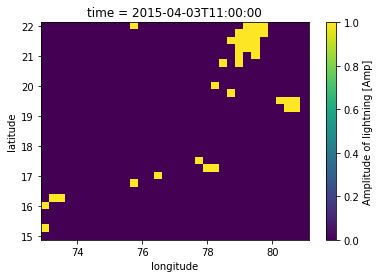

In [ ]:
plot2d = data_2015.Amplitude.isel(time=59)
plot2d.plot()

### Saving the data as .netcdf file.

In [ ]:
data_2015.to_netcdf('/content/drive/MyDrive/Lightning/data/pre-processed data/data2015.nc')